#  Self-Study 6: Coupled Dynamics and Stability 2

In this self-study, we build upon the concepts explored in Self-Study 5. We will look into a complex systems, compute the Jacobian matrix, and explore the stability of the system.
Feel free to use the code from the previous self-study as a starting point.
The important thing is that you understand what the code is doing and remember the concepts.

As before, we will make extensive use of symbolic mathematics using `sympy`.

## Section 1: Fixed Points and Phase Portrait with Cubic Terms

In this section, we will consider a more complex system of ODEs with **two coupled** variables, $x$ and $y$, and a cubic term:


$$
\frac{dx}{dt} = \alpha x - \beta x^2 - \gamma xy
$$
$$
\frac{dy}{dt} = \delta y - \epsilon y^3 - xy
$$

### Task 1: Find the Fixed Points Analytically (with `sympy`)

In [22]:
from sympy import symbols, Eq, solve

# Declare variables
x, y = symbols('x y')
alpha, beta, gamma, delta, epsilon = symbols('alpha beta gamma delta epsilon')

# Define the equations for dx/dt and dy/dt with a cubic term in dy/dt
dx_dt = alpha * x - beta * x**2 - gamma * x * y
dy_dt = delta * y - epsilon * y**3 - x * y

# Set up equations for fixed points
eq1 = Eq(dx_dt, 0)
eq2 = Eq(dy_dt, 0)

# Solve for fixed points (This may take a while, around 30 seconds)
fixed_points = solve((eq1, eq2), (x, y))
fixed_points


[(0, 0),
 (0, -sqrt(delta/epsilon)),
 (0, sqrt(delta/epsilon)),
 (alpha/beta, 0),
 ((3*alpha*beta*epsilon*gamma - alpha*beta*epsilon*sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2) - 2*beta**2*delta*epsilon*gamma - gamma**3 + gamma**2*sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2))/(beta**2*epsilon*(gamma - sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2))),
  (gamma - sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2))/(2*beta*epsilon)),
 ((3*alpha*beta*epsilon*gamma + alpha*beta*epsilon*sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2) - 2*beta**2*delta*epsilon*gamma - gamma**3 - gamma**2*sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2))/(beta**2*epsilon*(gamma + sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2))),
  (gamma + sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2))/(2*beta*epsilon))]

### Task 2: Plot the phase portrait

The phase portrait is a plot of the trajectories of the system in the $x-y$ plane. It is useful to visualise the dynamics of the system.


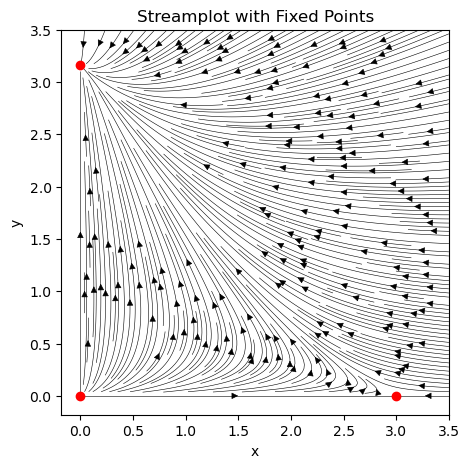

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Find numerical values for the fixed points for the symbolic solutions you found earlier.
# Set values for the parameters

alpha_val = 3
beta_val = 1
gamma_val = 3
delta_val = 5
epsilon_val = 1/2

substitution_dict = {alpha: alpha_val, beta: beta_val, gamma: gamma_val, delta: delta_val, epsilon: epsilon_val}

fixed_points_val = []
for p1, p2 in fixed_points:
    x_val = float(p1.subs(substitution_dict))
    y_val = float(p2.subs(substitution_dict))
    fixed_points_val.append((x_val, y_val))


# Step 2: Generate streamplot of the vector field defined by the equations above. **Hint:** Look at the matplotlib documentation for the `streamplot` function.
X, Y = np.meshgrid(np.linspace(0, 3.5, 40), np.linspace(0, 3.5, 40))
U = alpha_val * X - beta_val * X**2 - gamma_val * X * Y
V = delta_val * Y - epsilon_val * Y**3 - X * Y

plt.figure(figsize=(5, 5))
plt.streamplot(X, Y, U, V, color='k', density=3, linewidth=.4, zorder=1)

# Step 3: Overlay fixed points onto the streamplot, NOTE: only points that are positive
for point in fixed_points_val:
    p1, p2 = point
    if p1 >= 0 and p2 >= 0:
        plt.scatter(point[0], point[1], color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Streamplot with Fixed Points')
plt.show()



## Section 2: Stability of Fixed Points

In this section, we will examine the stability of the fixed points for our system.


### Task 1: Define the Jacobian Matrix

First, let's define the Jacobian matrix of the system. The Jacobian matrix $J$ is given by:

$$
J = \begin{pmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{pmatrix}
$$

You can use `sympy` to find these partial derivatives and construct the Jacobian matrix.

In [4]:
from sympy import diff, Matrix

# Define the differential equations
dx_dt = alpha * x - beta * x**2 - gamma * x * y
dy_dt = delta * y - epsilon* y**3 - x * y

# Define the Jacobian matrix
J = Matrix([
    [diff(dx_dt, x), diff(dx_dt, y)], 
    [diff(dy_dt, x), diff(dy_dt, y)]
])
J

Matrix([
[alpha - 2*beta*x - gamma*y,                   -gamma*x],
[                        -y, delta - 3*epsilon*y**2 - x]])

### Task 2: Compute Eigenvalues for Each (positive) Fixed Point

After obtaining the Jacobian matrix, the next step is to find its eigenvalues at each fixed point. The eigenvalues will give us insights into the stability of these fixed points.

**Only consider the fixed points that are positive.**

In [5]:
for point in fixed_points:
    x_val, y_val = point
    x_val = float(x_val.subs(substitution_dict))
    y_val = float(y_val.subs(substitution_dict))
    
    if x_val < 0 or y_val < 0:
        continue
    
    J_at_point = J.subs({x: x_val, y: y_val})
    J_at_point = J_at_point.subs(substitution_dict)
    eigenvalues = J_at_point.eigenvals()
    print(f"Fixed point at {(x_val, y_val)}: Eigenvalues {eigenvalues}")

Fixed point at (0.0, 0.0): Eigenvalues {3: 1, 5: 1}
Fixed point at (0.0, 3.1622776601683795): Eigenvalues {-6.48683298050514: 1, -10.0000000000000: 1}
Fixed point at (3.0, 0.0): Eigenvalues {-3.00000000000000: 1, 2.00000000000000: 1}


In [20]:
def stability_type(J):
    """Method of direction fields to determine the stability type of a fixed point
    
    Args:
        J (numpy.ndarray): Jacobian matrix
    """
    # if the jacobian is sympy.Matrix, convert it to numpy.ndarray
    if isinstance(J, Matrix):
        J = np.array(J.tolist()).astype(np.float64)
    
    # Compute the trace and determinant of the Jacobian matrix    

    tau = np.trace(J)
    delta = np.linalg.det(J)
    
    if delta < 0:
        return "saddle point"
    elif delta > 0 and tau == 0:
        return "center"
    elif delta > 0 and tau != 0:
        if tau > 0:
            if tau**2 - 4*delta < 0:
                return "unstable spiral"
            else:
                return "unstable node"
        elif tau < 0:
            if tau**2 - 4*delta < 0:
                return "stable spiral"
            else:
                return "stable node"
    else:
        return "Unknown"
    
for point in fixed_points:
    x_val, y_val = point
    J_at_point = J.subs({x: x_val, y: y_val}).subs(substitution_dict)
    ev = J_at_point.eigenvals()
    # evs are returned as a dictionary, ev: multiplicity
    ev = list(ev.keys())
    print(f"{point}\t{stability_type(J_at_point)} \t  {ev}")

(0, 0)	unstable node 	  [3, 5]
(0, -sqrt(delta/epsilon))	saddle point 	  [12.4868329805051, -10.0000000000000]
(0, sqrt(delta/epsilon))	stable node 	  [-6.48683298050514, -10.0000000000000]
(alpha/beta, 0)	saddle point 	  [2, -3]
((3*alpha*beta*epsilon*gamma - alpha*beta*epsilon*sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2) - 2*beta**2*delta*epsilon*gamma - gamma**3 + gamma**2*sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2))/(beta**2*epsilon*(gamma - sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2))), (gamma - sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2))/(2*beta*epsilon))	stable spiral 	  [-2.59167308680402 - 1.94926994348734*I, -2.59167308680402 + 1.94926994348734*I]
((3*alpha*beta*epsilon*gamma + alpha*beta*epsilon*sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2) - 2*beta**2*delta*epsilon*gamma - gamma**3 - gamma**2*sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2))/(beta**2*epsilo

In [21]:
J

Matrix([
[alpha - 2*beta*x - gamma*y,                   -gamma*x],
[                        -y, delta - 3*epsilon*y**2 - x]])

## Section 3

In previous exercises (SS5), you were introduced to an economic model inspired by the Lotka-Volterra equations (see below). For this section, your task is to extend this basic model in some way, your choice.

##### Original Model
1. **Resource (r)**: Represents a natural resource that grow at a constant rate $a$, e.g., grain.
2. **Producers (y)**: Companies consume the resource to produce output $y$, at an operational cost of $c$, e.g., labor costs.
3. **Production**: The resource is consumed at a rate $k$ — proportional to both current production $y$ and available resources $r$.


The model is described by the following differential equations:
$$
\frac{dr}{dt} = a r - k y r
$$
$$
\frac{dy}{dt} = k y r -c y
$$

### Task 1: Propose an Extension to the Model
Think about additional factors that could be relevant be added.
Change the equations above and explain your reasoning.

### Task 2: Plot the Dynamics of Your Extended Model

### Task 3: What do we learn from this extension?